# ELE 435/535 Lab 7: Support Vector Machines

In [151]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.io as io

%matplotlib inline

In [152]:
# The following code is provided for use in this HW
# It generates nx labelled examples from each of two bi-variate Gaussian densities. 
#----------------------------------------------------------------------------------
def multinormaldata(nx, mu1, cov1, mu2, cov2):
    D = np.zeros((2*nx,2), float)
    D[0:nx,:] = np.random.multivariate_normal(mu1, cov1, nx)
    D[nx:2*nx,:] = np.random.multivariate_normal(mu2, cov2, nx)
    y = np.ones(2*nx, int)
    y[nx:] = -np.ones(nx)
    return D, y

## 1. Linear Support Vector Machine

**1.1) Generate a total of 100 samples from two 2D Gaussian densities.**  
a) Let $\mu_1 = (1,1)$ and $\mu_2 = (-1, -1)$ and $\Sigma_1 = \Sigma_2 = I_2$.  
b) Store the samples in a data matrix $X$ and labels in a vector $y$.    
c) Plot the labelled points in the 2D plane. Use color coding and marker shape to distinguish the two labels.

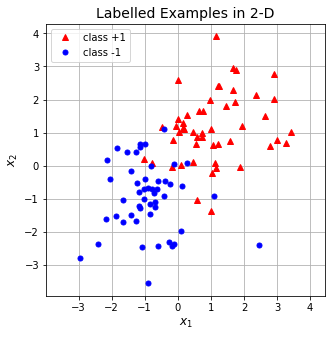

In [153]:
# Generate a binary class dataset
# This code is given to you

np.random.seed(220606)

nx  = 50
mu1 = np.array([1.,1.])
cov1 = np.eye(2)
mu2 = -mu1
cov2 = np.eye(2)

X, Y = multinormaldata(nx, mu1, cov1, mu2, cov2)

plt.figure(figsize=(5,5))
plt.plot(X[:nx,0],X[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X[nx:,0],X[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.2) Train a linear support vector machine on the generated data using $C=1$.**  
a) Plot the separating hyperplane (a line) that separates the two classes (use a solid line).  
b) Plot the two hyperlanes $w^\top x +b = \pm 1$ (use dashed lines).  
c) Mark the support vectors using a circle around each one.

**Note:** Use scikit-learn SVC. When you use SVC, make sure you specify a linear kernel by SVC(kernel='linear'...).

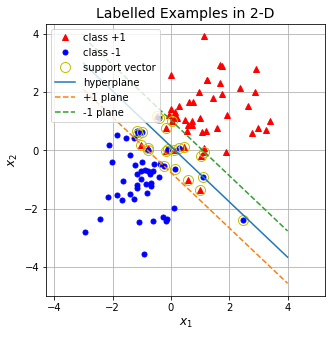

In [154]:
from sklearn import svm
#-------------------------
# This code is given to you
penalty = 1
svm_classifier = svm.SVC(kernel='linear',C=penalty)
svm_classifier.fit(X,Y)
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]
support_vector = svm_classifier.support_vectors_
#-------------------------

# Your Code Here

xvals = np.linspace(-3, 4, 400)

def hyperplane(w, b, x, parameter):
  return (parameter + b + w[0] * x) / (-w[1])

plt.figure(figsize=(5,5))
plt.plot(X[:nx,0],X[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X[nx:,0],X[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')

plt.plot(support_vector[:,0], support_vector[:,1], 'oy', markersize=10, linestyle='none', fillstyle="none", label="support vector")

plt.plot(xvals, hyperplane(w, b, xvals, 0), label="hyperplane")
plt.plot(xvals, hyperplane(w, b, xvals, 1), linestyle='dashed', label="+1 plane")
plt.plot(xvals, hyperplane(w, b, xvals, -1), linestyle='dashed', label="-1 plane")


plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.3) Repeat 1.2) using a set of values of $C$ ($10^{-3}$ ~$10^2$).**  
a) Do the same plot as 1.22) for each value of log(C), but leave out the $\pm 1$ hyperplanes (use subplot).  
b) On a separate plot, plot $\|w\|^2$ versus $log(C)$ as $log(C)$ varies over the above interval.  
c) Similarly, plot the number of support vectors vs. $log(C)$.   
d) How does $\|w\|^2$ change as the value of $C$ increases? Why does it change in that way?
e) How does the number of support vectors change as $C$ increases? Why does it change in that way? 


ANS: $||w||^2$ increases as C increases. This is because as C increases, the penalty for misclassifications become greater, so when minimizing the SVM problem, minimizing the number of misclassificiations is more important. To minimize misclassifications, we minimize the margins between the hyperplane and the +/- 1 hyperplanes, but a smaller margin means a larger $||w||^2$. The number of support vectors decreases as C increases. It changes that way because by the above reasoning, the margins decrease as C increases, so less points are going to be within the margins, and those points are exactly our support vectors.

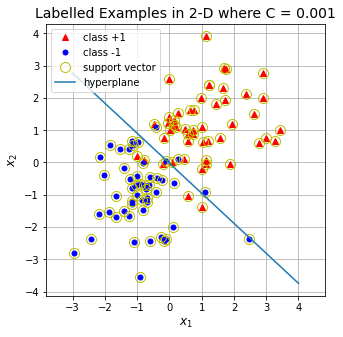

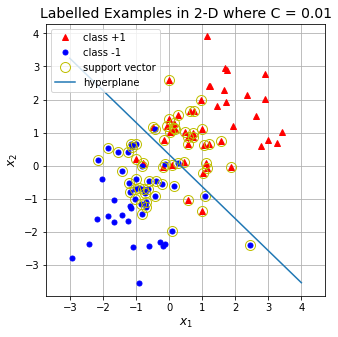

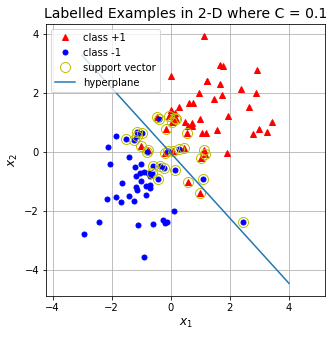

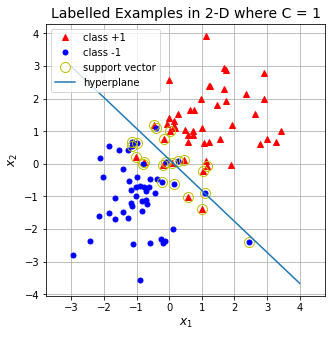

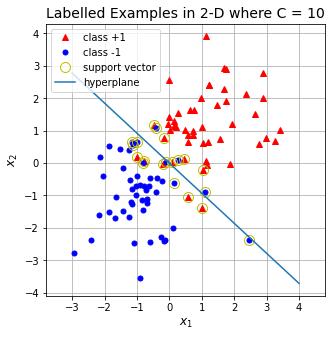

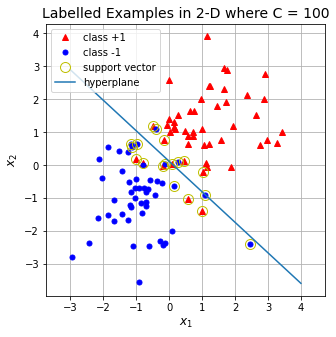

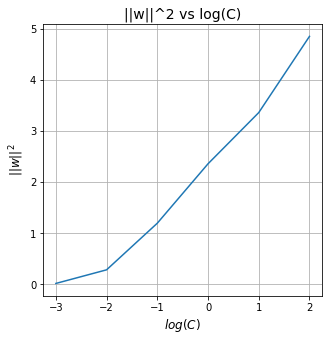

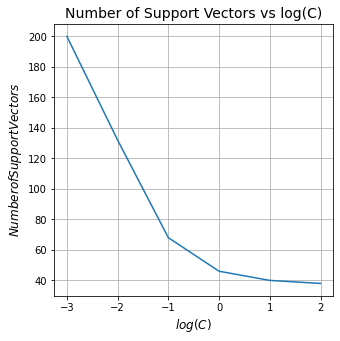

In [155]:
# The plt.subplot command may be useful

# Your Code Here
xvals = np.linspace(-3, 4, 400)

def hyperplane(w, b, x, parameter):
  return (parameter + b + w[0] * x) / (-w[1])
  
wnorm = []
logc = []
numsupp = []

counter = 0
while (counter < 6):

  penalty = 10**(-3 + counter) 
  svm_classifier = svm.SVC(kernel='linear',C=penalty)
  svm_classifier.fit(X,Y)
  w = svm_classifier.coef_[0]
  b = svm_classifier.intercept_[0]
  support_vector = svm_classifier.support_vectors_

  wnorm.append(np.square(np.linalg.norm(w)))
  logc.append(counter - 3)
  numsupp.append(support_vector.size)

  plt.figure(figsize=(5,5))
  plt.plot(X[:nx,0],X[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
  plt.plot(X[nx:,0],X[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')

  plt.plot(support_vector[:,0], support_vector[:,1], 'oy', markersize=10, linestyle='none', fillstyle="none", label="support vector")

  plt.plot(xvals, hyperplane(w, b, xvals, 0), label="hyperplane")

  plt.ylabel('$x_2$', fontsize=12)
  plt.xlabel('$x_1$', fontsize=12)
  plt.title('Labelled Examples in 2-D where C = ' + str(penalty),fontsize=14)
  plt.legend(loc='upper left')
  plt.axis([-6, 6, -6, 6])
  plt.axis('equal')
  plt.grid(True)
  plt.show()

  counter += 1

plt.figure(figsize=(5,5))
plt.plot(logc, wnorm)
plt.ylabel('$||w||^2$', fontsize=12)
plt.xlabel('$log(C)$', fontsize=12)
plt.title('||w||^2 vs log(C)',fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(logc, numsupp)
plt.ylabel('$Number of Support Vectors$', fontsize=12)
plt.xlabel('$log(C)$', fontsize=12)
plt.title('Number of Support Vectors vs log(C)',fontsize=14)
plt.grid(True)
plt.show()


## 2. SVM with Linear and Quadratic Kernels

**2.1) Generate Data**  
(a) Generate data as specified below.  
(b) Plot the data, use a distinct color and marker shape for each class.  
(c) Estimate the expected classification accuracy of linear classifier (give your reasoning) 

ANS: The graph seems to be completely linearly inseparable, as most hyperplanes that divide the data points seem to have a relatively equal number of each class in each half. Thus, the expected classification accuracy of a linear classifier should be around 50%, so equally likely to guess correct or incorrect. 

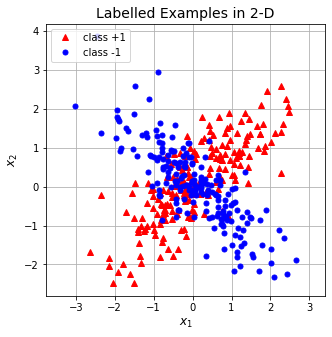

In [156]:
# Generate Training, Validation, and Testing Data
np.random.seed(31415926)
# generate data from two classes:
# first class mean1 = (0,0), Cov1 ~ sigma1 =1, sigma2=1, and correlation rho=0.8 
# second class mean2 = (0,0), Cov2 ~ sigma1 =1, sigma2=1, and correlation rho=-0.8

# generate 200 examples per class of training data and labels
# generate 200 examples per class of validation data and labels
# generate 3000 examples per class of testing data and labels
#----------------------------------------------------------------------------------
nx = 200
# Specify first Gaussian
mu1 = [0.0, 0.0]
sig11 = 1.0
sig12 = 1.0
rho1 = 0.8
cov1 = np.array([[sig11*sig11, sig11*sig12*rho1], [sig11*sig12*rho1, sig12*sig12]])

# Specify second Gaussian
mu2 = [0.0, 0.0]
sig21 = 1.0
sig22 = 1.0
rho2 = -0.8
cov2 = np.array([[sig21*sig21, sig21*sig22*rho2], [sig21*sig22*rho2, sig22*sig22]])

# Generate training data

X_train, Y_train = multinormaldata(nx, mu1, cov1, mu2, cov2)

# Generate validation data

X_val, Y_val = multinormaldata(nx, mu1, cov1, mu2, cov2)

# Generate test examples

X_test, Y_test = multinormaldata(3000, mu1, cov1, mu2, cov2)

# Plot the training data
plt.figure(figsize=(5,5))
plt.plot(X_train[:nx,0],X_train[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X_train[nx:,0],X_train[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**2.2) Train a Linear SVM classifier**

(a) Train over values of $log(C)$ from -3 to 3 in steps of 1.  
(b) Plot the resulting training and validation accuracies.  
(c) Use the plot from part (b) to select a value of $C$. Justify your choice.  

ANS: I would choose C = 1 because the accuracy doesn't seem to increase after C = 1, but we don't want to choose the highest C because then we would be shrinking our margins (makes it more difficult to generalize model since decision region is smaller) without gaining much. 

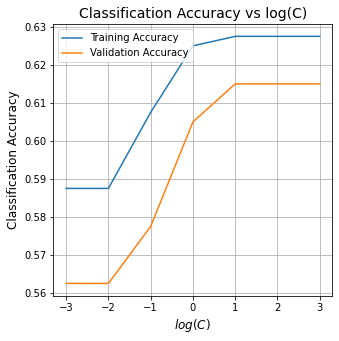

In [157]:
# Train a linear SVM Classifier
logc = []
acc_train = []
acc_val = []

counter = 0
while (counter < 7):

  penalty = 10**(-3 + counter) 
  svm_classifier = svm.SVC(kernel='linear',C=penalty)
  svm_classifier.fit(X_train,Y_train)
  # w_train = svm_classifier.coef_[0]
  # b_train = svm_classifier.intercept_[0]
  # support_vector_train = svm_classifier.support_vectors_

  predict_train = svm_classifier.predict(X_train)
  predict_val = svm_classifier.predict(X_val)

  acc_train.append(np.sum((Y_train * predict_train + 1) / 2) / 400)
  acc_val.append(np.sum((Y_val * predict_val + 1) / 2) / 400)

  logc.append(counter - 3)

  counter += 1

plt.figure(figsize=(5,5))

plt.plot(logc, acc_train, label='Training Accuracy')
plt.plot(logc, acc_val, label='Validation Accuracy')

plt.ylabel('Classification Accuracy', fontsize=12)
plt.xlabel('$log(C)$', fontsize=12)
plt.title('Classification Accuracy vs log(C)',fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**2.3) Use the selected value of $C$ to train a Linear SVM**   
(a) Use all of the training and validation data for training.  
(b) Plot the data, the SVM hyperplane, and the +1 and -1 hyperplanes. Circle the support vectors.   
(c) What is the classification accuracy? 0.61875

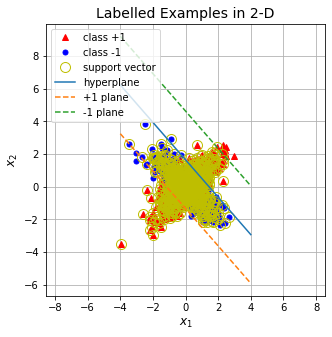

Classification Accuracy = 0.61875


In [158]:
penalty = 10 
xvals = np.linspace(-4, 4, 400)

def hyperplane(w, b, x, parameter):
  return (parameter + b + w[0] * x) / (-w[1])

X_both = np.vstack((X_train, X_val))
Y_both = np.hstack((Y_train, Y_val))

svm_classifier_both = svm.SVC(kernel='linear',C=penalty)
svm_classifier_both.fit(X_both,Y_both)
w_both = svm_classifier_both.coef_[0]
b_both = svm_classifier_both.intercept_[0]
support_vector_both = svm_classifier_both.support_vectors_

plt.figure(figsize=(5,5))
plt.plot(X_both[:nx,0],X_both[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X_both[nx:nx*2,0],X_both[nx:nx*2,1], 'ob', markersize=5, linestyle='none', label='class -1')
plt.plot(X_both[nx*2:nx*3,0],X_both[nx*2:nx*3,1], '^r', markersize=6, linestyle='none')
plt.plot(X_both[nx*3:,0],X_both[nx*3:,1], 'ob', markersize=5, linestyle='none')

plt.plot(support_vector_both[:,0], support_vector_both[:,1], 'oy', markersize=10, linestyle='none', fillstyle="none", label="support vector")

plt.plot(xvals, hyperplane(w_both, b_both, xvals, 0), label="hyperplane")
plt.plot(xvals, hyperplane(w_both, b_both, xvals, 1), label="+1 plane", linestyle='dashed')
plt.plot(xvals, hyperplane(w_both, b_both, xvals, -1), label="-1 plane", linestyle='dashed')

plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

predict_both = svm_classifier_both.predict(X_both)

acc_both = (np.sum((Y_both * predict_both + 1) / 2) / 800)
print("Classification Accuracy = " + str(acc_both))

**2.4) Quadratic kernel SVM**  
(a) Repeat part 2.2), except this time use a quadratic kernel in the SVM. See polynomial kernel option.  
(b) Use the validation curve to select a value of $C$. Record and justify your choice below.

ANS: log(C) = -1 seems to be the choice of C that yields the highest validation accuracy, so we will choose that (also want to keep C relatively lower to maximize margins).

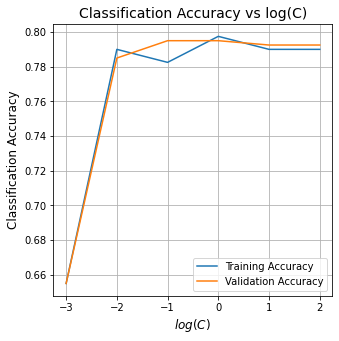

In [159]:
# Train a Quadratic Kernel SVM Classifier
# Train a linear SVM Classifier

logc = []
acc_train = []
acc_val = []

counter = 0
while (counter < 6):

  penalty = 10**(-3 + counter) 
  svm_classifier = svm.SVC(kernel='poly', degree=2, C=penalty)
  svm_classifier.fit(X_train,Y_train)

  predict_train = svm_classifier.predict(X_train)
  predict_val = svm_classifier.predict(X_val)

  acc_train.append(np.sum((Y_train * predict_train + 1) / 2) / 400)
  acc_val.append(np.sum((Y_val * predict_val + 1) / 2) / 400)

  logc.append(counter - 3)

  counter += 1

plt.figure(figsize=(5,5))

plt.plot(logc, acc_train, label='Training Accuracy')
plt.plot(logc, acc_val, label='Validation Accuracy')

plt.ylabel('Classification Accuracy', fontsize=12)
plt.xlabel('$log(C)$', fontsize=12)
plt.title('Classification Accuracy vs log(C)',fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**2.5) Using the selected value of C retrain on all Training + Validation Data**  
(a) What is the final training and testing accuracy?  
(b) How does this accuracy compare to that of the Linear SVM?
The accuracy is about 15-20% greater than linear SVM.

In [160]:
# Your Code Here

In [161]:
penalty = 10**(-1) 

X_both = np.vstack((X_train, X_val))
Y_both = np.hstack((Y_train, Y_val))

svm_classifier = svm.SVC(kernel='poly', degree=2, C=penalty)
svm_classifier.fit(X_both,Y_both)

predict_both = svm_classifier.predict(X_both)
predict_test = svm_classifier.predict(X_test)

acc_train = (np.sum((Y_both * predict_both + 1) / 2) / 800)
acc_test = (np.sum((Y_test * predict_test + 1) / 2) / 6000)

print("Final Training Accuracy: " + str(acc_train))
print("Final Testing Accuracy: " + str(acc_test))

Final Training Accuracy: 0.7975
Final Testing Accuracy: 0.7801666666666667
